# Error Analysis and Model Improvement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
model = load_model("../models/kochi_lstm_next_hour_multivariate.keras")

In [3]:
df = pd.read_csv("../data/processed/kochi_weather_scaled.csv")
data = df[['temperature', 'humidity', 'pressure']].values

TIME_STEPS = 24

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data, TIME_STEPS)

train_size = int(0.7 * len(X))
val_size = int(0.85 * len(X))

X_test = X[val_size:]
y_test = y[val_size:]

In [4]:
# Prediction and Residuals
y_pred = model.predict(X_test)

residuals = y_test - y_pred

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [5]:
# Variable wise error metrics
labels = ['Temperature', 'Humidity', 'Pressure']

for i, label in enumerate(labels):
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    print(f"{label}: MAE={mae:.4f}, RMSE={rmse:.4f}")


Temperature: MAE=0.0895, RMSE=0.1083
Humidity: MAE=0.0884, RMSE=0.1094
Pressure: MAE=0.0629, RMSE=0.0764


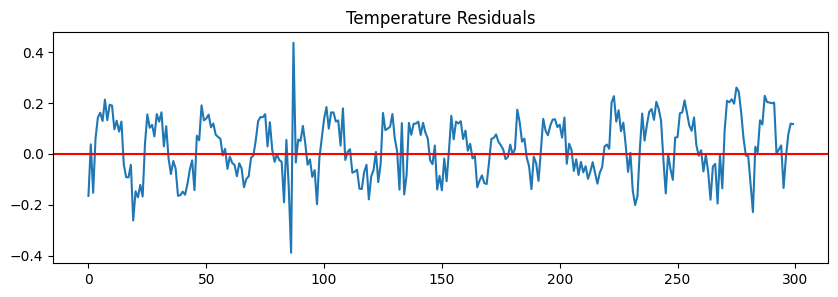

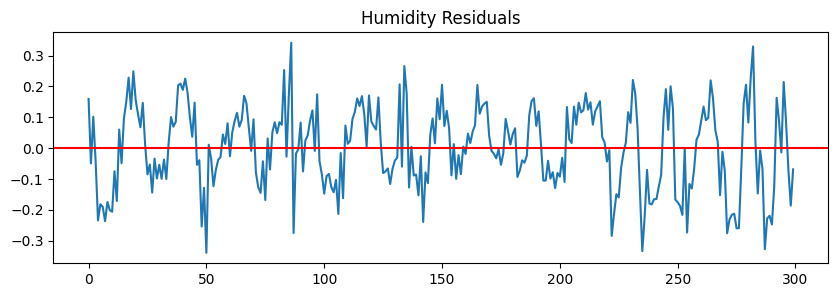

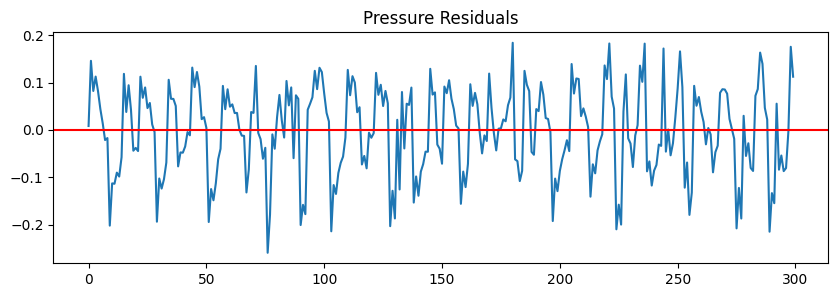

In [12]:
# Residual Plots
for i, label in enumerate(labels):
    plt.figure(figsize=(10,3))
    plt.plot(residuals[:300, i])
    plt.title(f"{label} Residuals")
    plt.axhline(0, color='red')
    filename = f"../results/plots/{label.lower()}_residuals.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

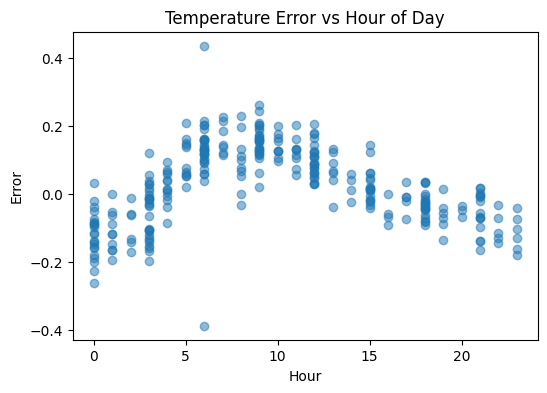

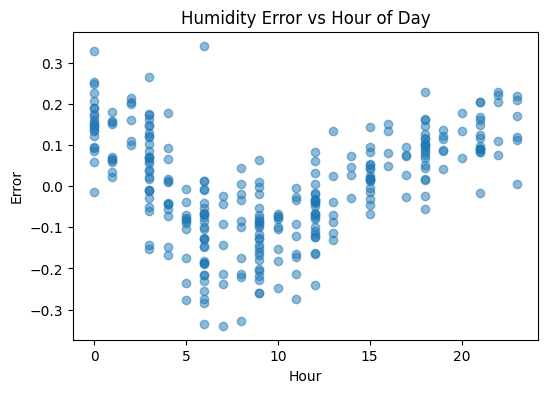

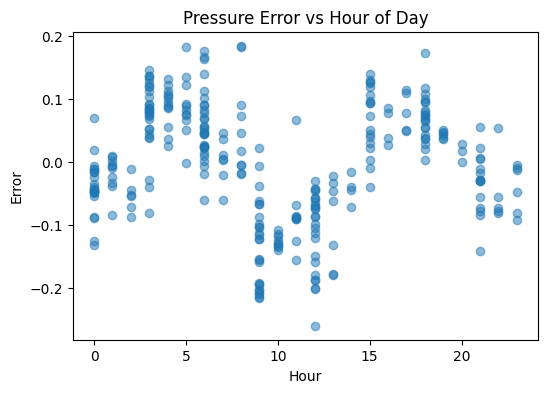

In [11]:
# Time of Day error analysis
df = pd.read_csv("../data/processed/kochi_weather_scaled.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
hours = df['DATE'].iloc[val_size+TIME_STEPS:].dt.hour.values

for i, label in enumerate(labels):
    plt.figure(figsize=(6,4))
    plt.scatter(hours[:300], residuals[:300, i], alpha=0.5)
    plt.title(f"{label} Error vs Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Error")
    filename = f"../results/plots/{label.lower()}_error_vs_hour.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

## Error Analysis Summary

- Temperature predictions show the lowest error and smooth residuals.
- Humidity errors are higher due to rapid atmospheric variability.
- Pressure prediction is the most challenging, with small-scale fluctuations.
- Error patterns vary with time of day, indicating diurnal effects.
